---
title: Day3. 머신러닝과 딥러닝 실습(Hands-On)
---

- 퍼셉트론을 활용한 머신러닝
    - AND, OR, NAND를 활용해서 XOR 문제를 해결하는 방법을 실습합니다.

In [1]:
import numpy as np

In [2]:
def AND(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [3]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


In [4]:
def NAND(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([-0.5, -0.5]) # 가중치
    b = 0.7 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [5]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


In [6]:
def OR(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.2 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


## 딥러닝을 활용한 XOR 문제 해결

In [8]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

In [9]:
print(XOR(0,0)) # 0
print(XOR(0,1)) # 1
print(XOR(1,0)) # 1
print(XOR(1,1)) # 0

0
1
1
0


## Sin 값 예측하기

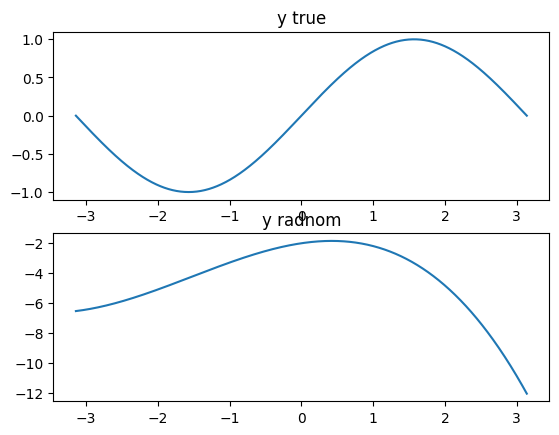

epoch1 loss:25594.9765625
epoch101 loss:1265.33349609375
epoch201 loss:1059.7664794921875
epoch301 loss:892.087646484375
epoch401 loss:751.0570678710938
epoch501 loss:632.4374389648438
epoch601 loss:532.6666870117188
epoch701 loss:448.74884033203125
epoch801 loss:378.1644287109375
epoch901 loss:318.7945556640625
epoch1001 loss:268.857177734375
epoch1101 loss:226.853515625
epoch1201 loss:191.5229949951172
epoch1301 loss:161.80514526367188
epoch1401 loss:136.8082275390625
epoch1501 loss:115.7820816040039
epoch1601 loss:98.09590911865234
epoch1701 loss:83.21913146972656
epoch1801 loss:70.70536041259766
epoch1901 loss:60.17919921875


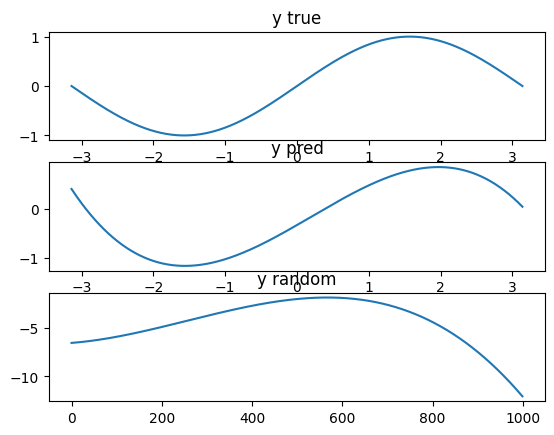

In [10]:
import math
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

y_random = a * x**3 + b * x**2 + c * x + d

plt.subplot(2, 1, 1)
plt.title("y true")
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title("y radnom")
plt.plot(x, y_random)
plt.show()

learning_rate = 1e-6

for epoch in range(2000):
   y_pred = a * x**3 + b * x**2 + c * x + d

   loss = (y_pred - y).pow(2).sum().item()
   if epoch % 100 == 0:
       print(f"epoch{epoch+1} loss:{loss}")

   grad_y_pred = 2.0 * (y_pred - y)
   grad_a = (grad_y_pred * x ** 3).sum()
   grad_b = (grad_y_pred * x ** 2).sum()
   grad_c = (grad_y_pred * x).sum()
   grad_d = grad_y_pred.sum()

   a -= learning_rate * grad_a
   b -= learning_rate * grad_b
   c -= learning_rate * grad_c
   d -= learning_rate * grad_d

plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

plt.subplot(3, 1, 3)
plt.plot(y_random)
plt.title("y random")
plt.show()